In [1]:
import rasterio as rio
#https://stackoverflow.com/questions/67903219/how-to-read-multiband-image-files-with-more-than-4-bands-in-python


# import georasters as gt
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# data_loc = '/home/saumya/Documents/NRSC internship/Dataset/MRSDP_SLC_DATA/EOS4_FRS1_SLC/Pauli_Lee5X5/'
data_loc = '/home/saumya/Documents/NRSC SAR CVNN/Data-sets/MRSDP_SLC_DATA/EOS4_FRS1_SLC/Pauli_Lee5X5/'

# loc_list = ['imagery_HH_421.tif', 'imagery_HH_521.tif', 'imagery_HH_721.tif']
# goblin = '.npy'

In [3]:
# for i in range(3):
#     dat = rio.open(data_loc + loc_list[i])
#     arr1 = dat.read(1)
#     arr2 = dat.read(2)
#     arr3 = np.array(arr1 + 1j*arr2)
#     # arr3 = arr3.reshape(8371, 13619)
#     np.save(data_loc+loc_list[i], arr3)

In [4]:
img = 'Pauli_RGB.tif'

In [5]:
dat = rio.open(data_loc + img)

In [6]:
# using 1 for red, 2 for green and 3 for blue as show in QGIS

arr2 = dat.read(2)
arr3 = dat.read(3)
arr1 = dat.read(1)

In [7]:
arr1_per = arr1/(arr1 + arr2 + arr3)
arr2_per = arr2/(arr1 + arr2 + arr3)
arr3_per = arr3/(arr1 + arr2 + arr3)

In [8]:
arr1_per = arr1_per*100
arr2_per = arr2_per*100
arr3_per = arr3_per*100

In [9]:
print(arr1_per[0][3], arr2_per[0][3], arr2_per[0][3]) 

58.16505 30.792141 30.792141


(array([[2495., 1628., 1112., ...,  198.,  119.,   27.],
        [2479., 1564., 1165., ...,  223.,  111.,   31.],
        [2484., 1563., 1117., ...,  244.,  114.,   36.],
        ...,
        [2338., 1459., 1140., ...,  278.,  174.,   52.],
        [2272., 1472.,  998., ...,  323.,  159.,   64.],
        [2321., 1413., 1079., ...,  282.,  178.,   62.]]),
 array([ 0.        ,  9.99940491, 19.99880981, 29.99821472, 39.99761963,
        49.99702454, 59.99642944, 69.99583435, 79.99523926, 89.99464417,
        99.99404907]),
 <a list of 4038 BarContainer objects>)

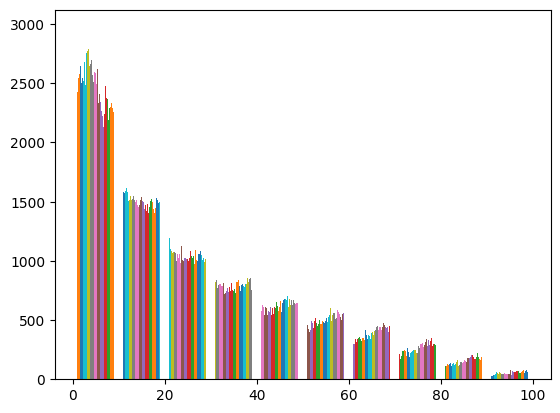

In [10]:
plt.hist(arr1_per)

(array([[2310., 1659., 1225., ...,  146.,   89.,   16.],
        [2382., 1696., 1219., ...,  153.,   80.,   25.],
        [2443., 1659., 1192., ...,  172.,   74.,   18.],
        ...,
        [2370., 1692., 1365., ...,  114.,   41.,   11.],
        [2381., 1755., 1276., ...,  106.,   39.,    7.],
        [2403., 1797., 1340., ...,  101.,   52.,    9.]]),
 array([ 0.        ,  9.99918175, 19.99836349, 29.99754715, 39.99672699,
        49.99591064, 59.9950943 , 69.99427795, 79.99345398, 89.99263763,
        99.99182129]),
 <a list of 4038 BarContainer objects>)

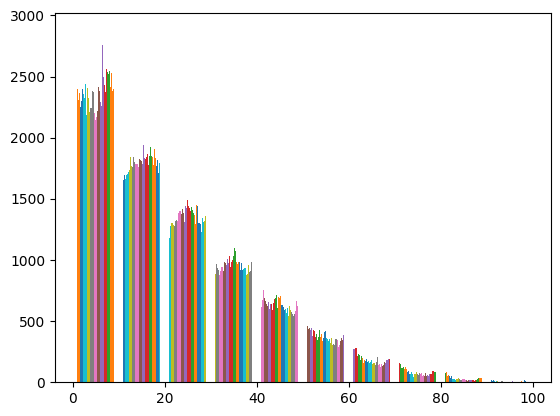

In [11]:
plt.hist(arr2_per)

(array([[610., 687., 736., ..., 951., 890., 453.],
        [648., 691., 684., ..., 970., 879., 491.],
        [676., 658., 718., ..., 927., 865., 508.],
        ...,
        [757., 696., 675., ..., 966., 824., 404.],
        [742., 691., 780., ..., 938., 784., 401.],
        [732., 693., 701., ..., 999., 816., 397.]]),
 array([ 0.        ,  9.9996357 , 19.99927139, 29.99890518, 39.99854279,
        49.99817657, 59.99781036, 69.99744415, 79.99708557, 89.99671936,
        99.99635315]),
 <a list of 4038 BarContainer objects>)

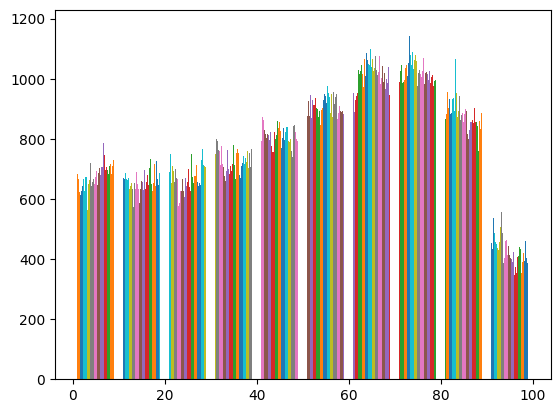

In [12]:
plt.hist(arr3_per)

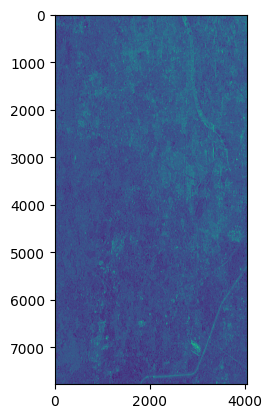

In [13]:
plt.imshow(arr1_per)

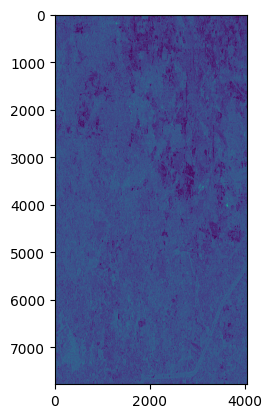

In [14]:
plt.imshow(arr2_per)

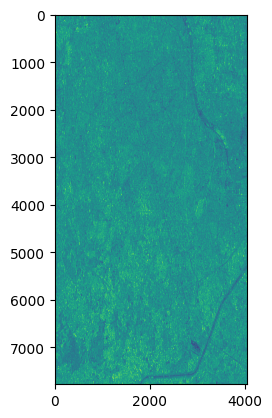

In [15]:
plt.imshow(arr3_per)

In [16]:
arr1_per.shape[1]

4038

In [17]:
mask = np.zeros_like(arr1_per)
for i in range(arr1_per.shape[0]):
    for j in range(arr1_per.shape[1]):
        if arr1_per[i][j] > 70:
            mask[i][j]=1
        elif arr2_per[i][j] > 70:
            mask[i][j]=2
        elif arr3_per[i][j] > 70:
            mask[i][j]=3
            if arr2_per[i][j] >50:
                print(arr2_per[i][j])


In [18]:
mask

array([[0., 0., 0., ..., 0., 1., 3.],
       [0., 0., 0., ..., 0., 3., 3.],
       [0., 0., 0., ..., 0., 2., 0.],
       ...,
       [3., 2., 0., ..., 3., 0., 0.],
       [0., 2., 0., ..., 0., 3., 0.],
       [3., 1., 3., ..., 0., 0., 0.]], dtype=float32)

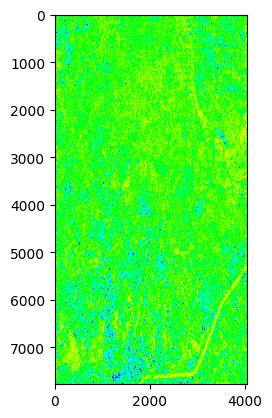

In [19]:
plt.imshow(mask, cmap='hsv')

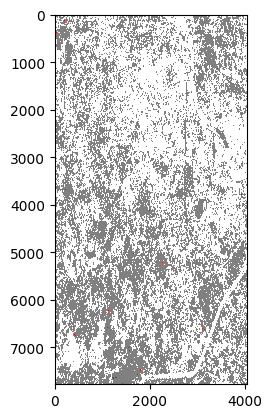

In [20]:
import matplotlib as mpl

colors = ['white','gray', 'red','blue']
levels = [0, 1, 2, 3]

cmap, norm = mpl.colors.from_levels_and_colors(levels=levels, colors=colors, extend='max')

plt.imshow(mask, cmap=cmap, norm=norm)


In [21]:
mask[0]

array([0., 0., 0., ..., 0., 1., 3.], dtype=float32)